<a href="https://colab.research.google.com/github/AmalaRaju/DDDS-Projects/blob/main/Project6_Image_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Image Classification with Deep Learning

This project introduces us to deep learning. The deep learning process is a huge leap forward in data science and the field is less than 15 years old.

The data collection portion of deep learning projects is a rather complex task. In other words, there is no CSV file that we can load to serve as our training data. Constructing a training data set is a rather large undertaking. We have imported all the training images (took hours) and I will show you how you can load the training data through the "pickle" process.

There are three files in this data set:
- [the feature set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle ), i.e. images of dogs and cats ( mostly )
- [the target set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle ), i.e. the label (0/1) that something is a dog or cat ( mostly )
- [a test image]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg )


This project will classify new, unseen images of cats and dogs. This was one of the first big success stories of deep learning and we will go through the process of building a learning algorithm that will do this task. Distinguishing a picture of a cat from a picture of a dog is easy for humans to do, but had been notoriously difficult to get a computer learning to perform well on the task. Deep learning solved that.

The same data sets as above, but you can copy the links by viewing the markdown directly to bypass Google Colab's annoying "You are leaving Colab" link.




https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg


# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



The objective of this project is to develop a deep learning model capable of accurately classifying images of cats and dogs. Given a dataset of labeled images (cats and dogs), the model will learn to distinguish between the two categories. This classification task is a supervised learning problem where the model is trained using a feature set of images and a target set of corresponding labels (0,1 ).We do not know in prior whether label 0 represents a cat or a dog; this will be learned from the data. The final model will be evaluated on its ability to correctly classify new, unseen images as either a cat or a dog.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import requests
from PIL import Image
from io import BytesIO

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
# Your S3 bucket URL
s3_url_X = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle"
s3_url_y = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle"

def load_pickle_from_s3_with_keras(s3_url):
    # Download the file with Keras utils
    local_file_path = tf.keras.utils.get_file(origin=s3_url)

    # Load the pickle file
    with open(local_file_path, 'rb') as f:
        data = pickle.load(f)

    return data

# Load the pickled data
X = load_pickle_from_s3_with_keras(s3_url_X)
y = load_pickle_from_s3_with_keras(s3_url_y)


249460166/249460166 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
49948/49948 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X),type(y)

(numpy.ndarray, list)

In [ ]:
X.shape

(24946, 100, 100, 1)

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



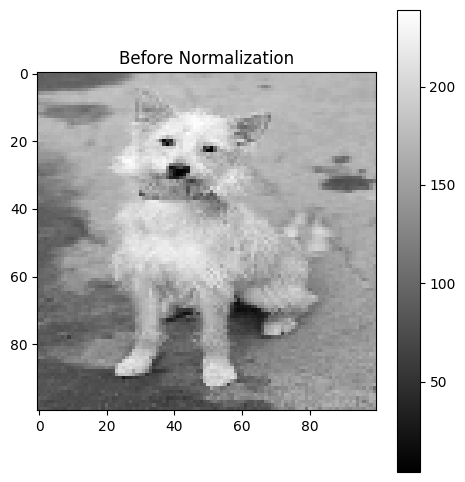

In [ ]:
# Displaying an example image before normalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Before Normalization")
plt.imshow(X[0].squeeze(), cmap='gray')  # Squeeze removes the single channel dimension
plt.colorbar()

In [ ]:
X[0]

array([[[ 95],
        [ 94],
        [ 98],
        ...,
        [170],
        [172],
        [171]],

       [[ 92],
        [ 91],
        [ 95],
        ...,
        [170],
        [172],
        [171]],

       [[ 89],
        [ 91],
        [ 92],
        ...,
        [165],
        [169],
        [169]],

       ...,

       [[ 84],
        [ 76],
        [ 73],
        ...,
        [135],
        [164],
        [154]],

       [[ 82],
        [ 79],
        [ 71],
        ...,
        [142],
        [134],
        [153]],

       [[ 80],
        [ 85],
        [ 85],
        ...,
        [151],
        [146],
        [138]]], dtype=uint8)

In [ ]:
#Scale the values in X so that they fall between 0 and 1
X_scaled = X / 255.0
print("Scaled X range:", X_scaled.min(), "-", X_scaled.max())

Scaled X range: 0.0 - 1.0


In [ ]:
X_scaled[0]

array([[[0.37254902],
        [0.36862745],
        [0.38431373],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.36078431],
        [0.35686275],
        [0.37254902],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.34901961],
        [0.35686275],
        [0.36078431],
        ...,
        [0.64705882],
        [0.6627451 ],
        [0.6627451 ]],

       ...,

       [[0.32941176],
        [0.29803922],
        [0.28627451],
        ...,
        [0.52941176],
        [0.64313725],
        [0.60392157]],

       [[0.32156863],
        [0.30980392],
        [0.27843137],
        ...,
        [0.55686275],
        [0.5254902 ],
        [0.6       ]],

       [[0.31372549],
        [0.33333333],
        [0.33333333],
        ...,
        [0.59215686],
        [0.57254902],
        [0.54117647]]])

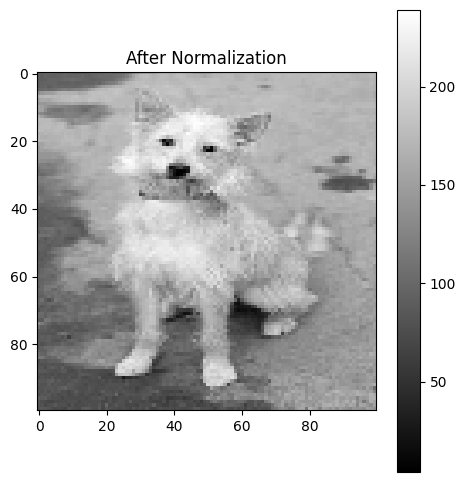

In [ ]:
# Displaying an example image after normalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("After Normalization")
plt.imshow(X[0].squeeze(), cmap='gray')  # Squeeze removes the single channel dimension
plt.colorbar()

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [ ]:
X_scaled.shape

(24946, 100, 100, 1)

In [ ]:
len(y)

24946

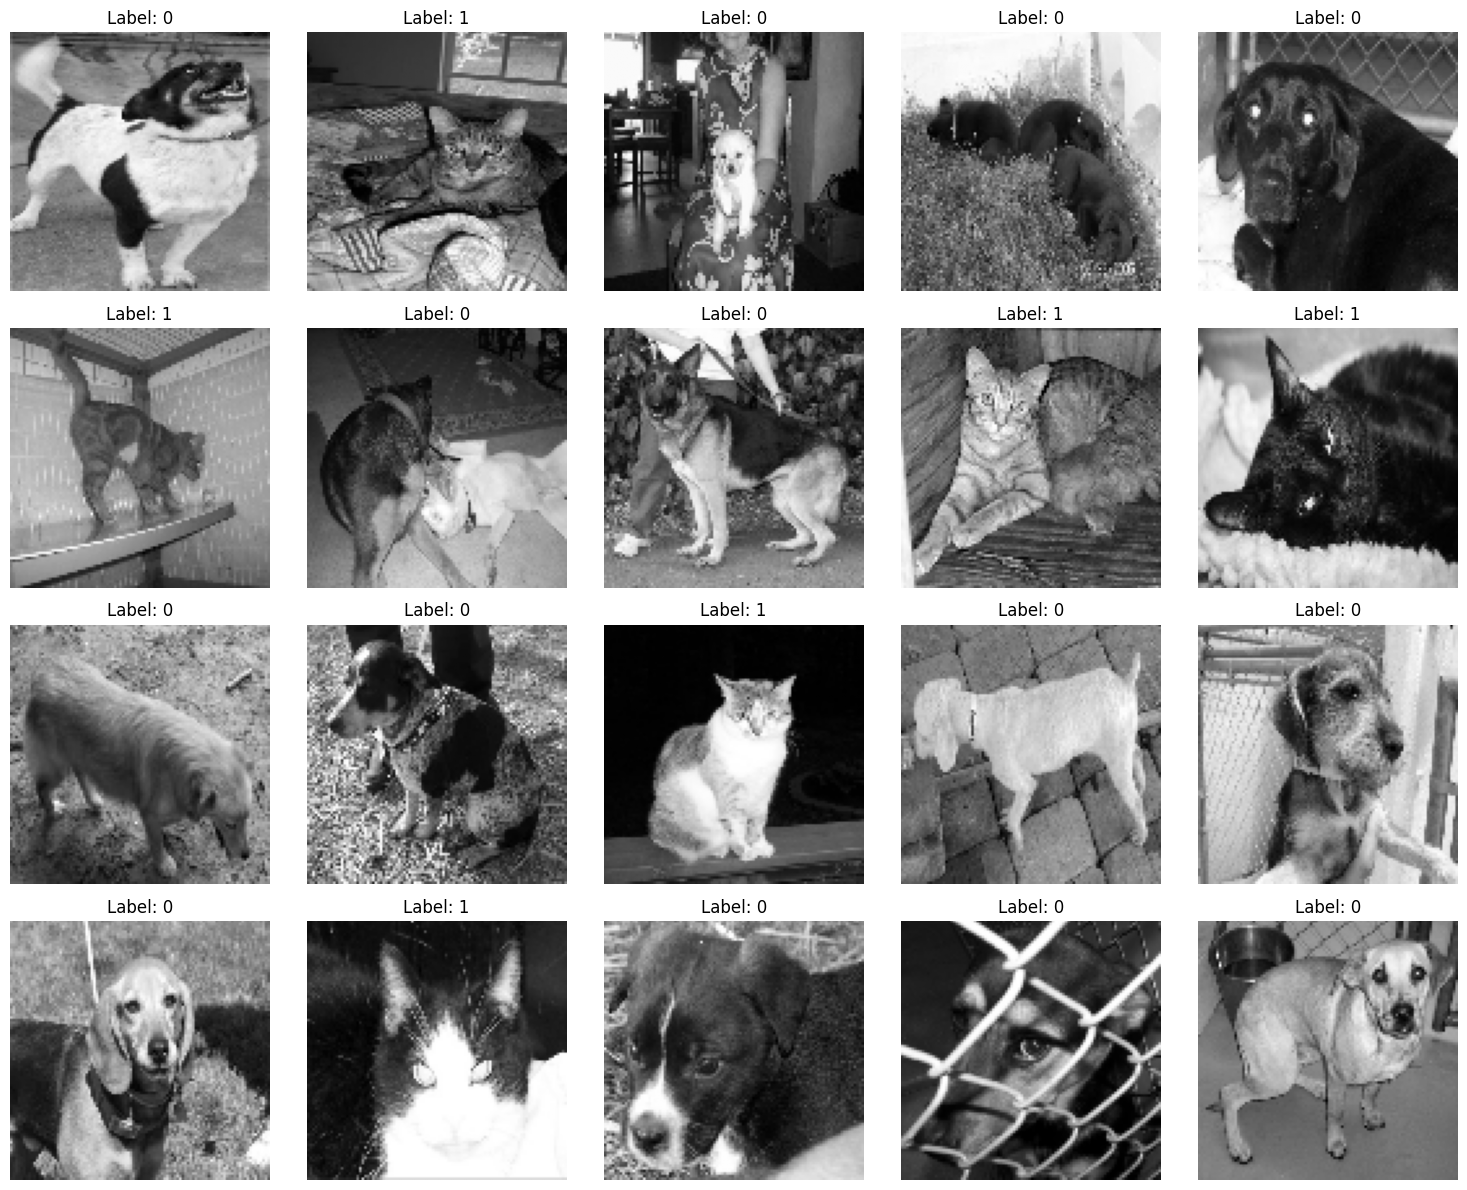

In [ ]:
# Ensure X is 4-dimensional
if X_scaled.ndim != 4:
    raise ValueError(f"Expected X to be 4-dimensional but got shape: {X_scaled.shape}")

# Set the number of images to plot (change this to 10 or 20 as needed)
num_images_to_plot = 20  # or 10

# Select random indices
indices = np.random.choice(len(X_scaled), num_images_to_plot, replace=False)

# Determine grid size (e.g., for 10 → 2x5, for 20 → 4x5)
cols = 5
rows = (num_images_to_plot + cols - 1) // cols  # ensures enough rows

plt.figure(figsize=(3 * cols, 3 * rows))
for i, idx in enumerate(indices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_scaled[idx].squeeze(), cmap='gray') # Squeeze removes the single channel dimension
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

It looks like mostly dogs represents label 0 and cats represents a label 1

## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



###Split X and y into training and testing sets

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Ensure y_train and y_test are NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
print(type(y_train))

# Verifying the shapes and types
print("Training set (X):", X_train.shape, "Type:", type(X_train))
print("Training set (y):", len(y_train), "Type:", type(y_train))
print("Testing set (X):", X_test.shape)
print("Testing set (y):", len(y_test))

<class 'numpy.ndarray'>
Training set (X): (19956, 100, 100, 1) Type: <class 'numpy.ndarray'>
Training set (y): 19956 Type: <class 'numpy.ndarray'>
Testing set (X): (4990, 100, 100, 1)
Testing set (y): 4990


###Sequential layers

In [ ]:
X_train.ndim

4

In [ ]:
X_train[0].shape

(100, 100, 1)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_scaled.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Build improved CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2], 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),  # Helps generalization
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 6: Compile the Model
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

In [ ]:
# Fit model
# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1,verbose=2)

# Step 8: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/15
562/562 - 14s - 26ms/step - binary_accuracy: 0.5924 - loss: 0.6569 - val_binary_accuracy: 0.6919 - val_loss: 0.5826
Epoch 2/15
562/562 - 13s - 23ms/step - binary_accuracy: 0.7121 - loss: 0.5595 - val_binary_accuracy: 0.7540 - val_loss: 0.5103
Epoch 3/15
562/562 - 10s - 18ms/step - binary_accuracy: 0.7547 - loss: 0.5006 - val_binary_accuracy: 0.7645 - val_loss: 0.4855
Epoch 4/15
562/562 - 10s - 18ms/step - binary_accuracy: 0.7880 - loss: 0.4496 - val_binary_accuracy: 0.8061 - val_loss: 0.4133
Epoch 5/15
562/562 - 10s - 18ms/step - binary_accuracy: 0.8107 - loss: 0.4141 - val_binary_accuracy: 0.8051 - val_loss: 0.4066
Epoch 6/15
562/562 - 10s - 18ms/step - binary_accuracy: 0.8304 - loss: 0.3778 - val_binary_accuracy: 0.8181 - val_loss: 0.3788
Epoch 7/15
562/562 - 10s - 18ms/step - binary_accuracy: 0.8429 - loss: 0.3503 - val_binary_accuracy: 0.8231 - val_loss: 0.3744
Epoch 8/15
562/562 - 6s - 10ms/step - binary_accuracy: 0.8576 - loss: 0.3193 - val_binary_accuracy: 0.8312 - va

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,736,005 (10.44 MB)

 Trainable params: 912,001 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,824,004 (6.96 MB)

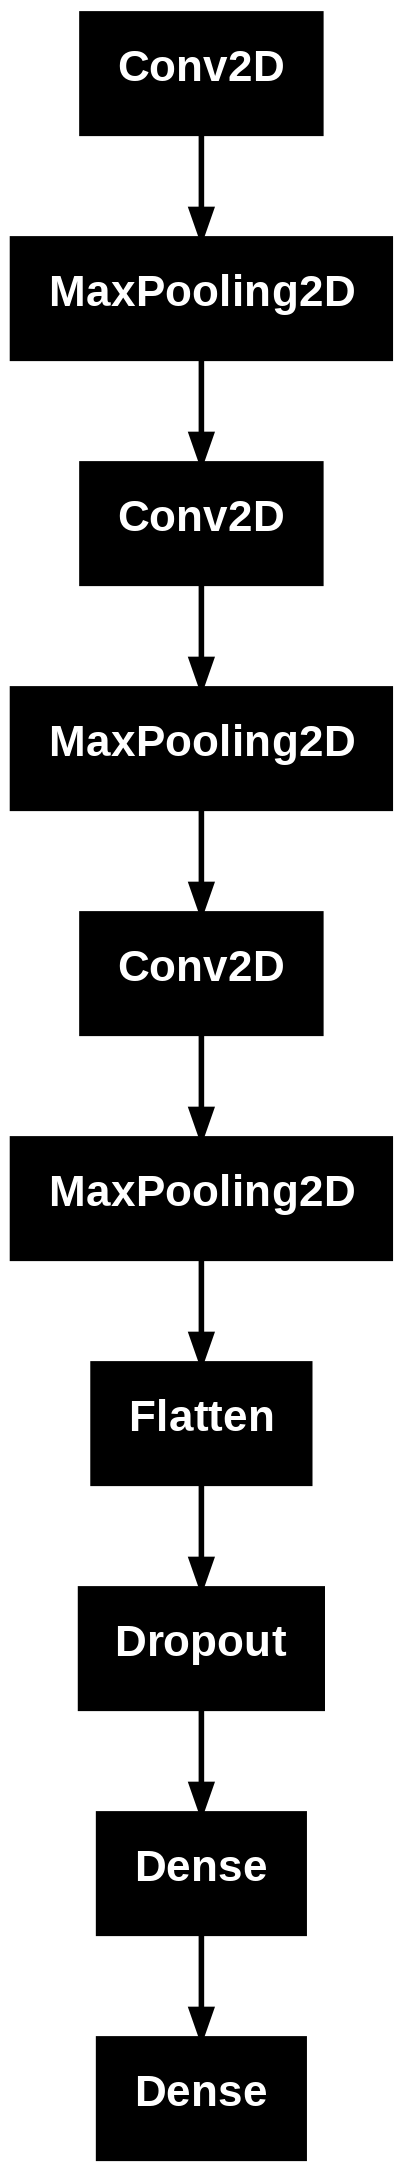

In [ ]:
plot_model(model)

In [ ]:
print(np.unique(y_train, return_counts=True))

(array([0, 1]), array([9976, 9980]))


156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


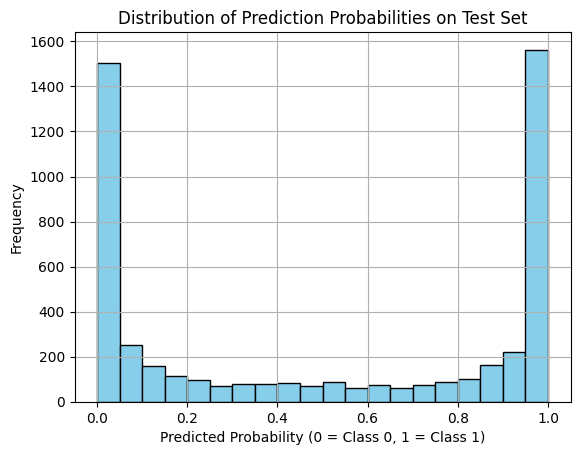

In [ ]:
# Step 9: Plot Distribution of Prediction Probabilities
pred_probs = model.predict(X_test).flatten()

plt.hist(pred_probs, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prediction Probabilities on Test Set')
plt.xlabel('Predicted Probability (0 = Class 0, 1 = Class 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Define a function that will read in a new image and convert it to a 4 dimensional array of pixels

In [ ]:
image_url='https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [ ]:
def prepare_image_from_url(url, target_size=(X_scaled.shape[1], X_scaled.shape[2])):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to download image: status code {response.status_code}")

    # Convert to grayscale ('L') to match training input shape (e.g. 100x100x1)
    img = Image.open(BytesIO(response.content)).convert('L')  # 'L' = grayscale
    img = img.resize(target_size)

    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array.reshape(1, target_size[0], target_size[1], 1)  # Shape: (1, H, W, 1)



In [ ]:
new_img = prepare_image_from_url(image_url)
prediction = model.predict(new_img)[0][0]

print(f"Prediction Score: {prediction:.4f}")
print("Model predicts: Class 0" if prediction >= 0.5 else "Model predicts: Class 1")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction Score: 0.6425
Model predicts: Class 0


The test image used is a dog and our prediction says it belongs to class 0 as per our assumption above.

## Communication of Results



* Communicate the results of your analysis.



The model was successfully trained to classify images into two classes.

The prediction probability distribution shows how confidently the model distinguishes between the two classes.